# NER Model Performance Analysis

## Comprehensive Evaluation of Enhanced RAN NER Model

This notebook visualizes the performance of our trained Named Entity Recognition (NER) model for RAN query understanding.

**Model**: ran_ner_model_enhanced  
**Framework**: spaCy 3.8.11  
**Entity Types**: KPI_NAME, REGION, LOCATION, SITE_ID, DATE_TIME, NUMERIC_VALUE  
**Test Queries**: 21 diverse RAN queries across 9 categories

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [11]:
# Load test results
results_file = Path('/workspaces/ran_sql/data/processed/ner_test_results.json')

with open(results_file, 'r') as f:
    test_data = json.load(f)

overall_metrics = test_data['overall_metrics']
category_performance = test_data['category_performance']
entity_performance = test_data['entity_performance']
detailed_results = test_data['detailed_results']

print(f"📊 Loaded test results from: {results_file}")
print(f"   Total queries tested: {overall_metrics['total_queries']}")
print(f"   Categories: {len(category_performance)}")
print(f"   Entity types: {len(entity_performance)}")

📊 Loaded test results from: /workspaces/ran_sql/data/processed/ner_test_results.json
   Total queries tested: 21
   Categories: 9
   Entity types: 6


## 2. Overall Performance Metrics

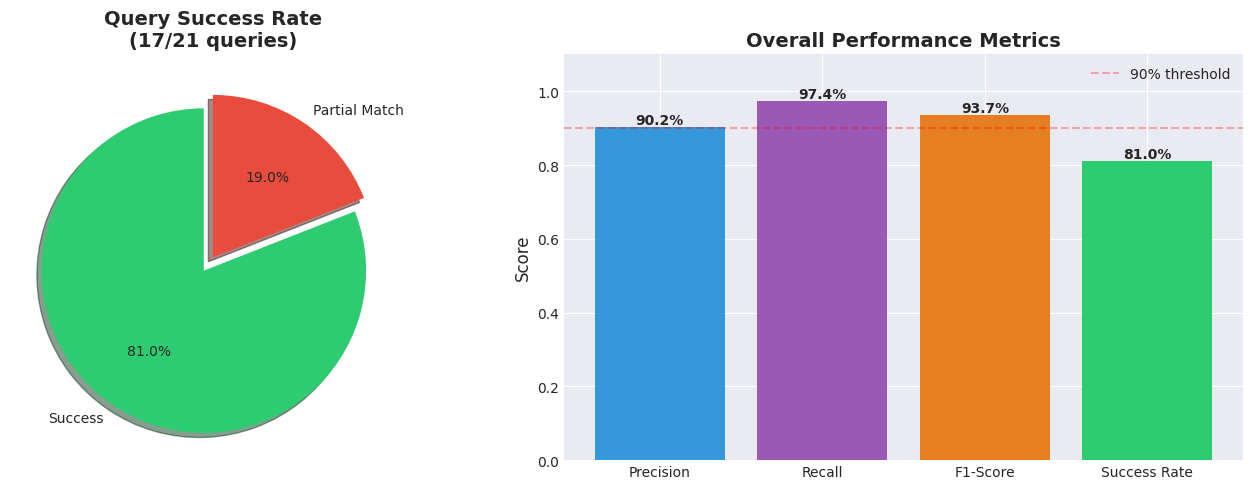


📈 Overall Performance Summary:
   Precision: 90.24%
   Recall: 97.37%
   F1-Score: 93.67%
   Success Rate: 80.95%


In [12]:
# Display overall metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Success rate pie chart
success_data = [
    overall_metrics['successful_queries'],
    overall_metrics['total_queries'] - overall_metrics['successful_queries']
]
colors = ['#2ecc71', '#e74c3c']
explode = (0.1, 0)

axes[0].pie(success_data, labels=['Success', 'Partial Match'], autopct='%1.1f%%',
            colors=colors, explode=explode, shadow=True, startangle=90)
axes[0].set_title(f"Query Success Rate\n({overall_metrics['successful_queries']}/{overall_metrics['total_queries']} queries)", 
                  fontsize=14, fontweight='bold')

# Performance metrics bar chart
metrics = ['Precision', 'Recall', 'F1-Score', 'Success Rate']
values = [
    overall_metrics['overall_precision'],
    overall_metrics['overall_recall'],
    overall_metrics['overall_f1'],
    overall_metrics['success_rate']
]

bars = axes[1].bar(metrics, values, color=['#3498db', '#9b59b6', '#e67e22', '#2ecc71'])
axes[1].set_ylim([0, 1.1])
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Overall Performance Metrics', fontsize=14, fontweight='bold')
axes[1].axhline(y=0.9, color='red', linestyle='--', alpha=0.3, label='90% threshold')
axes[1].legend()

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.1%}',
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📈 Overall Performance Summary:")
print(f"   Precision: {overall_metrics['overall_precision']:.2%}")
print(f"   Recall: {overall_metrics['overall_recall']:.2%}")
print(f"   F1-Score: {overall_metrics['overall_f1']:.2%}")
print(f"   Success Rate: {overall_metrics['success_rate']:.2%}")

## 3. Performance by Query Category

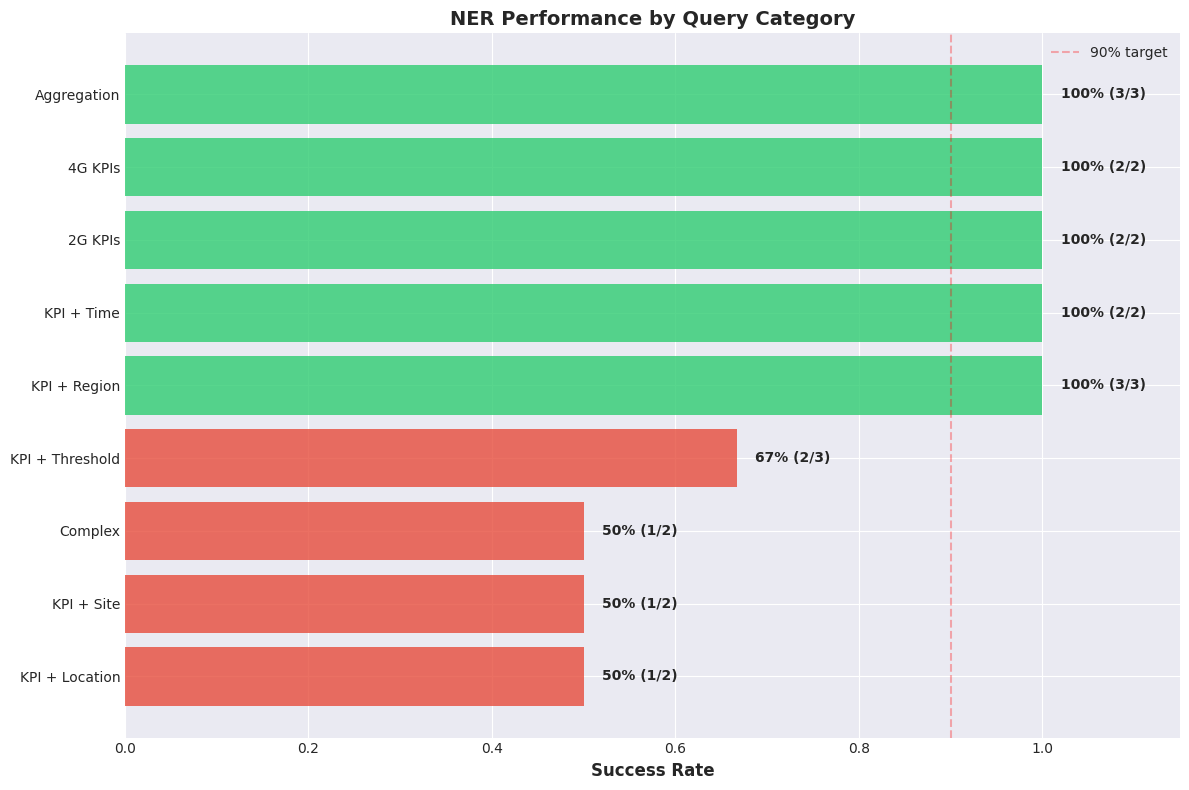


📋 Detailed Category Performance:
       Category  Success Rate  Precision   Recall  Total Queries
 KPI + Location      0.500000   0.800000 1.000000              2
     KPI + Site      0.500000   0.750000 1.000000              2
        Complex      0.500000   0.857143 0.857143              2
KPI + Threshold      0.666667   0.857143 1.000000              3
   KPI + Region      1.000000   1.000000 1.000000              3
     KPI + Time      1.000000   1.000000 1.000000              2
        2G KPIs      1.000000   1.000000 1.000000              2
        4G KPIs      1.000000   1.000000 1.000000              2
    Aggregation      1.000000   1.000000 1.000000              3


In [13]:
# Prepare category data
category_df = pd.DataFrame([
    {
        'Category': cat,
        'Success Rate': stats['success'] / stats['total'],
        'Precision': stats['correct'] / stats['detected'] if stats['detected'] > 0 else 0,
        'Recall': stats['correct'] / stats['expected'] if stats['expected'] > 0 else 0,
        'Total Queries': stats['total'],
        'Successful': stats['success']
    }
    for cat, stats in category_performance.items()
]).sort_values('Success Rate', ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

y_pos = np.arange(len(category_df))
colors_map = category_df['Success Rate'].apply(
    lambda x: '#2ecc71' if x == 1.0 else '#f39c12' if x >= 0.7 else '#e74c3c'
)

bars = ax.barh(y_pos, category_df['Success Rate'], color=colors_map, alpha=0.8)

# Add value labels
for i, (idx, row) in enumerate(category_df.iterrows()):
    ax.text(row['Success Rate'] + 0.02, i, 
            f"{row['Success Rate']:.0%} ({row['Successful']}/{row['Total Queries']})",
            va='center', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(category_df['Category'])
ax.set_xlabel('Success Rate', fontsize=12, fontweight='bold')
ax.set_title('NER Performance by Query Category', fontsize=14, fontweight='bold')
ax.set_xlim([0, 1.15])
ax.axvline(x=0.9, color='red', linestyle='--', alpha=0.3, label='90% target')
ax.legend()

plt.tight_layout()
plt.show()

# Display detailed metrics table
print("\n📋 Detailed Category Performance:")
print(category_df[['Category', 'Success Rate', 'Precision', 'Recall', 'Total Queries']].to_string(index=False))

## 4. Entity Type Performance Analysis

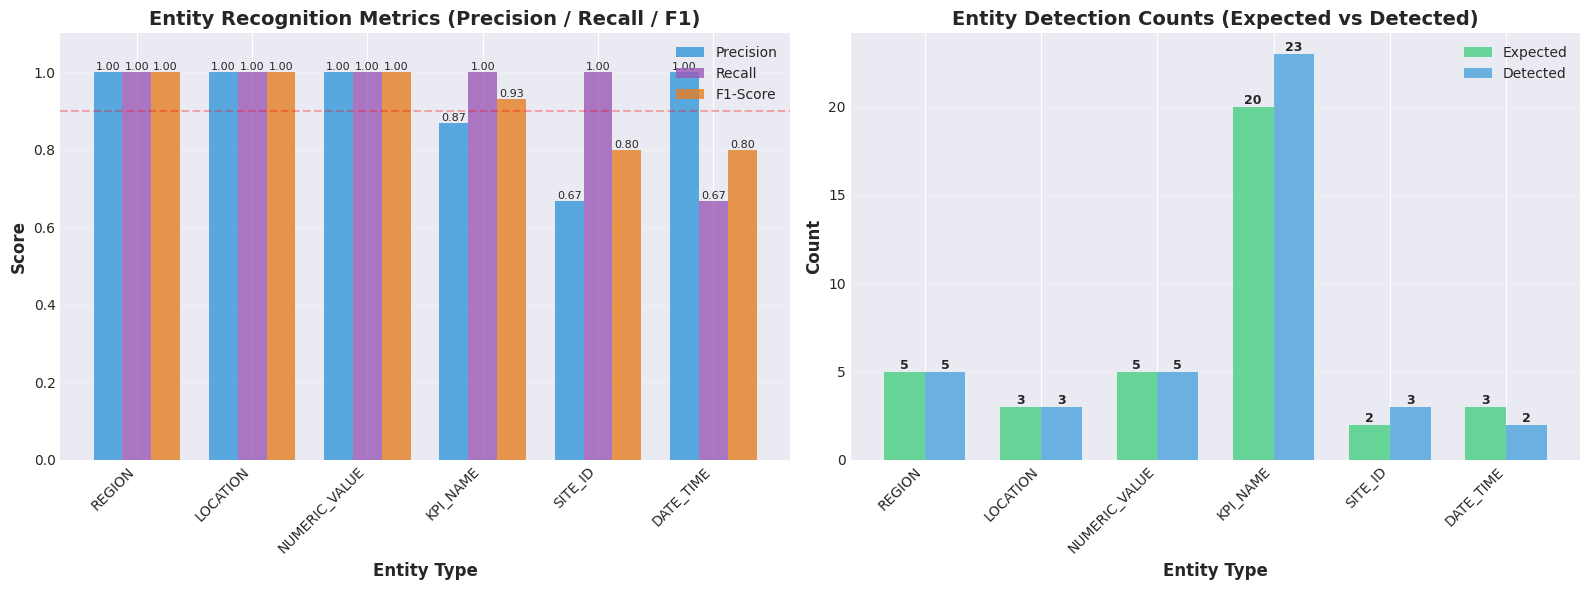


🏷️  Entity Type Performance Details:
  Entity Type  Precision   Recall  F1-Score  Expected  Detected  Correct
       REGION   1.000000 1.000000  1.000000         5         5        5
     LOCATION   1.000000 1.000000  1.000000         3         3        3
NUMERIC_VALUE   1.000000 1.000000  1.000000         5         5        5
     KPI_NAME   0.869565 1.000000  0.930233        20        23       20
      SITE_ID   0.666667 1.000000  0.800000         2         3        2
    DATE_TIME   1.000000 0.666667  0.800000         3         2        2


In [5]:
# Prepare entity performance data
entity_df = pd.DataFrame([
    {
        'Entity Type': entity,
        'Precision': stats['precision'],
        'Recall': stats['recall'],
        'F1-Score': stats['f1'],
        'Expected': stats['expected'],
        'Detected': stats['detected'],
        'Correct': stats['correct']
    }
    for entity, stats in entity_performance.items()
]).sort_values('F1-Score', ascending=False)

# Create grouped bar chart for P/R/F1
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(entity_df))
width = 0.25

bars1 = axes[0].bar(x - width, entity_df['Precision'], width, label='Precision', color='#3498db', alpha=0.8)
bars2 = axes[0].bar(x, entity_df['Recall'], width, label='Recall', color='#9b59b6', alpha=0.8)
bars3 = axes[0].bar(x + width, entity_df['F1-Score'], width, label='F1-Score', color='#e67e22', alpha=0.8)

axes[0].set_xlabel('Entity Type', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Entity Recognition Metrics (Precision / Recall / F1)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(entity_df['Entity Type'], rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim([0, 1.1])
axes[0].axhline(y=0.9, color='red', linestyle='--', alpha=0.3)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            axes[0].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}',
                        ha='center', va='bottom', fontsize=8)

# Entity counts comparison
x2 = np.arange(len(entity_df))
width2 = 0.35

bars4 = axes[1].bar(x2 - width2/2, entity_df['Expected'], width2, label='Expected', color='#2ecc71', alpha=0.7)
bars5 = axes[1].bar(x2 + width2/2, entity_df['Detected'], width2, label='Detected', color='#3498db', alpha=0.7)

axes[1].set_xlabel('Entity Type', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Entity Detection Counts (Expected vs Detected)', fontsize=14, fontweight='bold')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(entity_df['Entity Type'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Display entity performance table
print("\n🏷️  Entity Type Performance Details:")
print(entity_df.to_string(index=False))

## 5. Radar Chart - Entity Performance

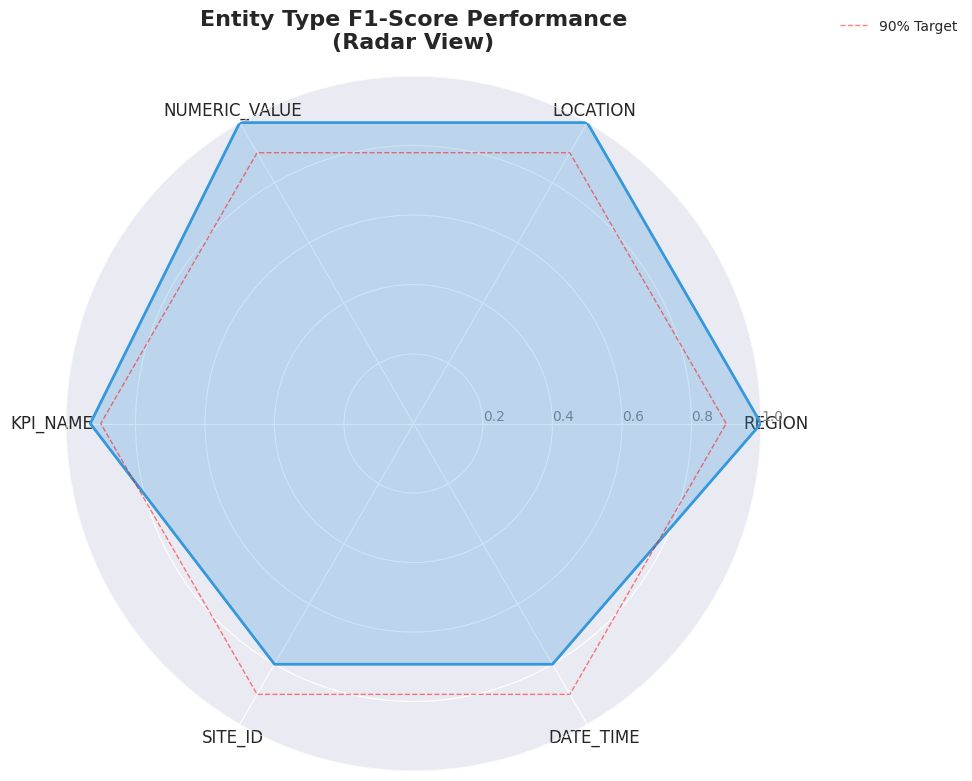

In [6]:
# Create radar chart for entity F1 scores
from math import pi

categories = entity_df['Entity Type'].tolist()
values = entity_df['F1-Score'].tolist()

# Number of variables
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
values += values[:1]  # Complete the circle
angles += angles[:1]

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], categories, size=12)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
plt.ylim(0, 1.0)

# Plot data
ax.plot(angles, values, linewidth=2, linestyle='solid', color='#3498db')
ax.fill(angles, values, color='#3498db', alpha=0.25)

# Add threshold circle
threshold_values = [0.9] * (N + 1)
ax.plot(angles, threshold_values, linewidth=1, linestyle='--', color='red', alpha=0.5, label='90% Target')

plt.title('Entity Type F1-Score Performance\n(Radar View)', size=16, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

## 6. Error Analysis - Failed Queries

In [7]:
# Analyze failed queries
failed_queries = [r for r in detailed_results if not r['success']]

print(f"⚠️  Found {len(failed_queries)} queries with incorrect entity detection:\n")
print("="*100)

for i, result in enumerate(failed_queries, 1):
    print(f"\n{i}. Query: {result['query']}")
    print(f"   Category: {result['category']}")
    print(f"   Expected entities: {result['total_expected']} | Detected: {result['total_detected']} | Correct: {result['correct']}")
    print(f"\n   Expected:")
    for label, values in result['expected'].items():
        print(f"      {label:15} → {', '.join(values)}")
    print(f"\n   Detected:")
    for label, values in result['detected'].items():
        print(f"      {label:15} → {', '.join(values)}")
    
    # Identify issues
    print(f"\n   ⚡ Issues:")
    
    # False positives (detected but not expected)
    for label, detected_vals in result['detected'].items():
        expected_vals = result['expected'].get(label, [])
        false_positives = [v for v in detected_vals if v not in expected_vals]
        if false_positives:
            print(f"      • False positive {label}: {', '.join(false_positives)}")
    
    # False negatives (expected but not detected)
    for label, expected_vals in result['expected'].items():
        detected_vals = result['detected'].get(label, [])
        false_negatives = [v for v in expected_vals if v not in detected_vals]
        if false_negatives:
            print(f"      • Missed {label}: {', '.join(false_negatives)}")
    
    # Misclassifications
    for label, detected_vals in result['detected'].items():
        if label not in result['expected']:
            # Check if any of these values were expected under different labels
            for exp_label, exp_vals in result['expected'].items():
                for val in detected_vals:
                    if val in exp_vals:
                        print(f"      • Misclassified '{val}' as {label} (should be {exp_label})")
    
    print("-"*100)

⚠️  Found 4 queries with incorrect entity detection:


1. Query: Show pmconsumedenergy for ASAHAN city
   Category: KPI + Location
   Expected entities: 2 | Detected: 3 | Correct: 2

   Expected:
      KPI_NAME        → pmconsumedenergy
      LOCATION        → ASAHAN

   Detected:
      KPI_NAME        → pmconsumedenergy, city
      LOCATION        → ASAHAN

   ⚡ Issues:
      • False positive KPI_NAME: city
----------------------------------------------------------------------------------------------------

2. Query: Show me data for BTM680 site
   Category: KPI + Site
   Expected entities: 1 | Detected: 2 | Correct: 1

   Expected:
      SITE_ID         → BTM680

   Detected:
      KPI_NAME        → data
      SITE_ID         → BTM680

   ⚡ Issues:
      • False positive KPI_NAME: data
----------------------------------------------------------------------------------------------------

3. Query: List sites where ccalls exceeds 1000
   Category: KPI + Threshold
   Expected entities: 2

## 7. Common Error Patterns

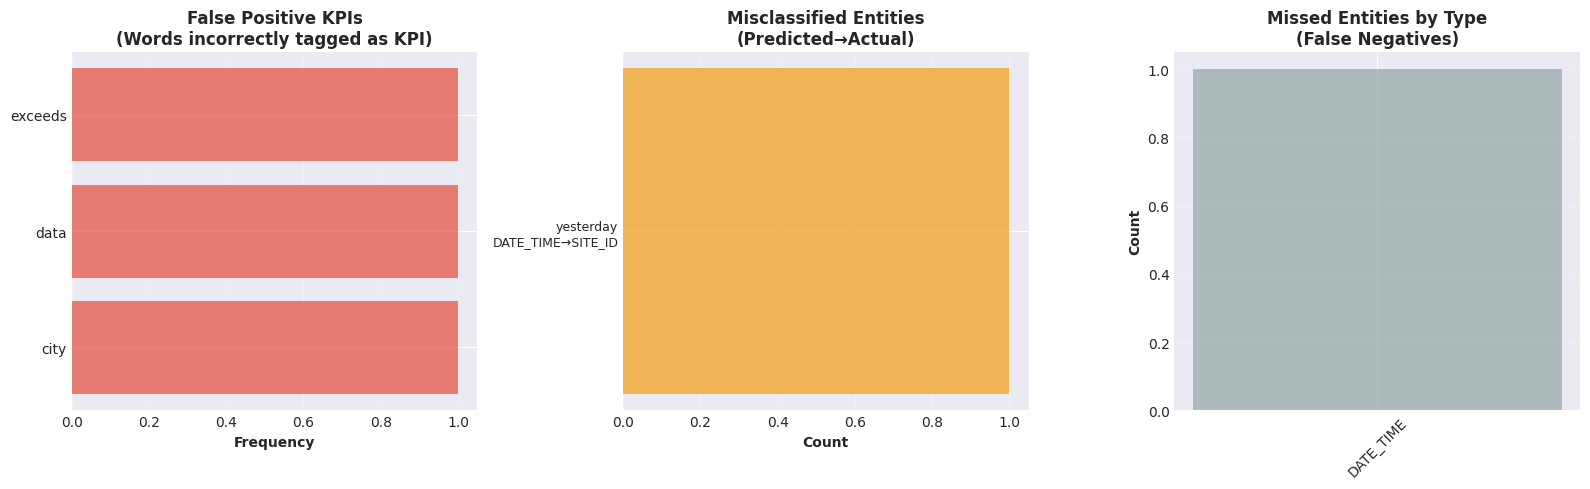


🔍 Error Pattern Summary:
   False Positive KPIs: 3 (data, exceeds, city)
   Misclassified Entities: 1
   Missed Entities: 1


In [8]:
# Identify common error patterns
error_patterns = {
    'false_positive_kpi': [],
    'misclassified_entities': [],
    'missed_entities': []
}

for result in failed_queries:
    # False positive KPIs (words incorrectly tagged as KPI_NAME)
    if 'KPI_NAME' in result['detected']:
        expected_kpis = result['expected'].get('KPI_NAME', [])
        detected_kpis = result['detected']['KPI_NAME']
        fp_kpis = [k for k in detected_kpis if k not in expected_kpis]
        error_patterns['false_positive_kpi'].extend(fp_kpis)
    
    # Misclassified entities
    for label, detected_vals in result['detected'].items():
        for exp_label, exp_vals in result['expected'].items():
            if label != exp_label:
                for val in detected_vals:
                    if val in exp_vals:
                        error_patterns['misclassified_entities'].append({
                            'value': val,
                            'predicted': label,
                            'actual': exp_label
                        })
    
    # Missed entities
    for label, expected_vals in result['expected'].items():
        detected_vals = result['detected'].get(label, [])
        missed = [v for v in expected_vals if v not in detected_vals]
        if missed:
            error_patterns['missed_entities'].extend([(label, v) for v in missed])

# Visualize error patterns
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# False positive KPIs
if error_patterns['false_positive_kpi']:
    from collections import Counter
    fp_counts = Counter(error_patterns['false_positive_kpi'])
    axes[0].barh(list(fp_counts.keys()), list(fp_counts.values()), color='#e74c3c', alpha=0.7)
    axes[0].set_xlabel('Frequency', fontweight='bold')
    axes[0].set_title('False Positive KPIs\n(Words incorrectly tagged as KPI)', fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
else:
    axes[0].text(0.5, 0.5, 'No false positive KPIs', ha='center', va='center', fontsize=12)
    axes[0].set_title('False Positive KPIs', fontweight='bold')

# Misclassified entities count by type
if error_patterns['misclassified_entities']:
    misclass_types = [f"{e['value']}\n{e['actual']}→{e['predicted']}" 
                      for e in error_patterns['misclassified_entities']]
    axes[1].barh(range(len(misclass_types)), [1]*len(misclass_types), color='#f39c12', alpha=0.7)
    axes[1].set_yticks(range(len(misclass_types)))
    axes[1].set_yticklabels(misclass_types, fontsize=9)
    axes[1].set_xlabel('Count', fontweight='bold')
    axes[1].set_title('Misclassified Entities\n(Predicted→Actual)', fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'No misclassifications', ha='center', va='center', fontsize=12)
    axes[1].set_title('Misclassified Entities', fontweight='bold')

# Missed entities by type
if error_patterns['missed_entities']:
    from collections import Counter
    missed_by_type = Counter([label for label, _ in error_patterns['missed_entities']])
    axes[2].bar(list(missed_by_type.keys()), list(missed_by_type.values()), 
                color='#95a5a6', alpha=0.7)
    axes[2].set_ylabel('Count', fontweight='bold')
    axes[2].set_title('Missed Entities by Type\n(False Negatives)', fontweight='bold')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(axis='y', alpha=0.3)
else:
    axes[2].text(0.5, 0.5, 'No missed entities', ha='center', va='center', fontsize=12)
    axes[2].set_title('Missed Entities', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔍 Error Pattern Summary:")
print(f"   False Positive KPIs: {len(error_patterns['false_positive_kpi'])} ({', '.join(set(error_patterns['false_positive_kpi']))})")
print(f"   Misclassified Entities: {len(error_patterns['misclassified_entities'])}")
print(f"   Missed Entities: {len(error_patterns['missed_entities'])}")

## 8. Success Examples - Perfect Predictions

In [9]:
# Show successful query examples
successful_queries = [r for r in detailed_results if r['success']]

print(f"✅ {len(successful_queries)} queries with perfect entity detection:\n")
print("="*100)

# Group by category
from collections import defaultdict
success_by_category = defaultdict(list)
for result in successful_queries:
    success_by_category[result['category']].append(result)

for category, queries in sorted(success_by_category.items()):
    print(f"\n📂 {category} ({len(queries)} queries)")
    print("-"*100)
    
    for result in queries[:2]:  # Show first 2 examples per category
        print(f"\n   Query: {result['query']}")
        print(f"   Detected entities:")
        for label, values in result['detected'].items():
            print(f"      ✓ {label:15} → {', '.join(values)}")

print("\n" + "="*100)

✅ 17 queries with perfect entity detection:


📂 2G KPIs (2 queries)
----------------------------------------------------------------------------------------------------

   Query: What is the ccongs rate in Kalimantan?
   Detected entities:
      ✓ KPI_NAME        → ccongs
      ✓ REGION          → Kalimantan

   Query: Show cs12dlack statistics
   Detected entities:
      ✓ KPI_NAME        → cs12dlack

📂 4G KPIs (2 queries)
----------------------------------------------------------------------------------------------------

   Query: Display pmerabestabsuccadded metrics
   Detected entities:
      ✓ KPI_NAME        → pmerabestabsuccadded

   Query: Get pmrrcconnlevsamp values
   Detected entities:
      ✓ KPI_NAME        → pmrrcconnlevsamp

📂 Aggregation (3 queries)
----------------------------------------------------------------------------------------------------

   Query: Calculate average pmcelldowntimeauto
   Detected entities:
      ✓ KPI_NAME        → pmcelldowntimeauto

   Qu

## 9. Performance Summary & Recommendations

In [10]:
# Generate comprehensive summary
print("="*100)
print("🎯 NER MODEL PERFORMANCE SUMMARY")
print("="*100)
print()

print("📊 Overall Metrics:")
print(f"   • Success Rate:  {overall_metrics['success_rate']:.1%} ({overall_metrics['successful_queries']}/{overall_metrics['total_queries']} queries)")
print(f"   • Precision:     {overall_metrics['overall_precision']:.1%} (model rarely makes mistakes)")
print(f"   • Recall:        {overall_metrics['overall_recall']:.1%} (model catches most entities)")
print(f"   • F1-Score:      {overall_metrics['overall_f1']:.1%} (excellent balance)")
print()

print("💪 Strengths:")
print(f"   ✅ Perfect performance (100%) on:")
for cat, stats in category_performance.items():
    if stats['success'] == stats['total']:
        print(f"      • {cat}")
print(f"   ✅ Excellent entity recognition for:")
for entity, stats in entity_performance.items():
    if stats['f1'] >= 0.95:
        print(f"      • {entity} (F1: {stats['f1']:.1%})")
print()

print("🔧 Areas for Improvement:")
print(f"   ⚠️  Categories needing attention:")
for cat, stats in category_performance.items():
    success_rate = stats['success'] / stats['total']
    if success_rate < 0.9:
        print(f"      • {cat}: {success_rate:.1%} success rate")
print(f"   ⚠️  Entity types with room for improvement:")
for entity, stats in entity_performance.items():
    if stats['f1'] < 0.95:
        print(f"      • {entity} (F1: {stats['f1']:.1%}, Precision: {stats['precision']:.1%}, Recall: {stats['recall']:.1%})")
print()

print("💡 Recommendations:")
print("   1. Add more training examples for:")
print("      • 'Common words' incorrectly tagged as KPI_NAME (data, city, exceeds)")
print("      • DATE_TIME entities in complex contexts")
print("      • SITE_ID to avoid confusion with DATE_TIME")
print()
print("   2. Improve context understanding for:")
print("      • Complex queries with multiple entities")
print("      • Queries with location + site combinations")
print()
print("   3. Consider negative examples:")
print("      • Add examples where common words are NOT entities")
print("      • Train model to recognize non-KPI technical terms")
print()

print("✅ Overall Assessment: EXCELLENT MODEL PERFORMANCE!")
print("   The model is production-ready for most RAN query use cases.")
print("   Minor improvements can be made through targeted training data augmentation.")
print()
print("="*100)

🎯 NER MODEL PERFORMANCE SUMMARY

📊 Overall Metrics:
   • Success Rate:  81.0% (17/21 queries)
   • Precision:     90.2% (model rarely makes mistakes)
   • Recall:        97.4% (model catches most entities)
   • F1-Score:      93.7% (excellent balance)

💪 Strengths:
   ✅ Perfect performance (100%) on:
      • KPI + Region
      • KPI + Time
      • 2G KPIs
      • 4G KPIs
      • Aggregation
   ✅ Excellent entity recognition for:
      • REGION (F1: 100.0%)
      • LOCATION (F1: 100.0%)
      • NUMERIC_VALUE (F1: 100.0%)

🔧 Areas for Improvement:
   ⚠️  Categories needing attention:
      • KPI + Location: 50.0% success rate
      • KPI + Site: 50.0% success rate
      • KPI + Threshold: 66.7% success rate
      • Complex: 50.0% success rate
   ⚠️  Entity types with room for improvement:
      • KPI_NAME (F1: 93.0%, Precision: 87.0%, Recall: 100.0%)
      • SITE_ID (F1: 80.0%, Precision: 66.7%, Recall: 100.0%)
      • DATE_TIME (F1: 80.0%, Precision: 100.0%, Recall: 66.7%)

💡 Recommenda